In [7]:
import numpy as np
import matplotlib.pyplot as plt
import nfode
import random

def vdpo(x, m=1):
    dx1 = m*(x[0] - 1/3*x[0]**3 -x[1])
    dx2 = 1/m*x[0]
    return np.array([dx1, dx2])

def generate_data(model, x10, x20, start_time_point=0, end_time_point=10, dt = 0.01):
    num_points = int((end_time_point-start_time_point)/dt)
    t = np.arange(start_time_point, end_time_point, dt)
    x = np.zeros((2, num_points))  # 初始化 x 为二维数组
    x[:, 0] = [x10, x20]
    for i in range(1, num_points):
        x_last = x[:, i-1]
        ti = t[i-1]
        dt = t[i] - t[i-1]
        x_new = nfode.euler_step(model, dt, x_last)
        x[:, i] = x_new
    return t, x

In [8]:
#产生单一样本和带噪样本
data = generate_data(vdpo, 1, 1)
t_data, x_data = data
x_data_noised = x_data + np.random.normal(0, 0.1, size=x_data.shape)
np.savez('data.npz', t_data=t_data, x_data=x_data, x_data_noised=x_data_noised)

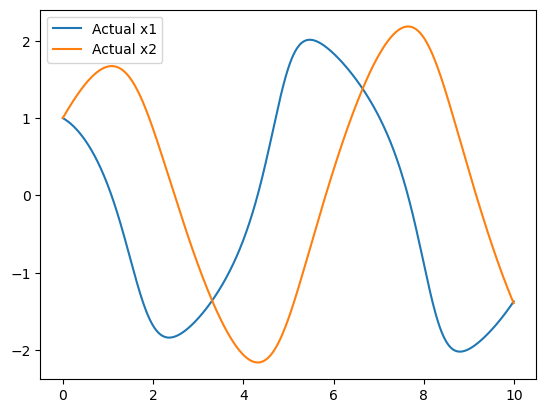

In [9]:
plt.plot(t_data, x_data[0, :], label='Actual x1')
plt.plot(t_data, x_data[1, :], label='Actual x2')

plt.legend()
plt.show()

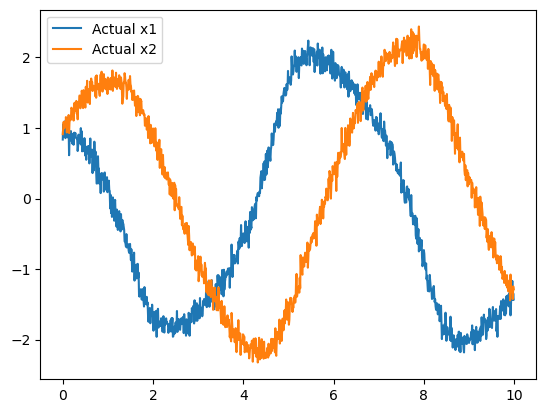

In [10]:
plt.plot(t_data, x_data_noised[0, :], label='Actual x1')
plt.plot(t_data, x_data_noised[1, :], label='Actual x2')

plt.legend()
plt.show()

In [11]:
#产生一批数据
data_scale = 100
data_matrix = np.zeros((2,1000,data_scale))
for i in range(data_scale):
    x1_0 = random.uniform(-2,2)
    x2_0 = random.uniform(-2,2)
    data = generate_data(vdpo, x1_0, x2_0)
    t_data, x_data = data
    data_matrix[:, :, i] = x_data
x_data = data_matrix
t_data = np.tile(t_data, (data_scale, 1))
np.savez('data_set.npz', t_data=t_data, x_data=x_data)

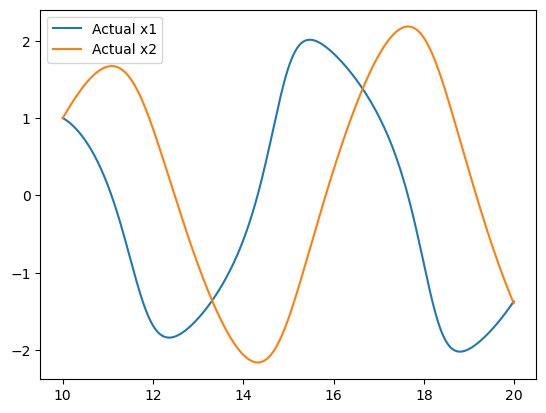

In [12]:
#产生测试数据
data = generate_data(vdpo, 1, 1, start_time_point=10, end_time_point=20)
t_data, x_data = data
plt.plot(t_data, x_data[0, :], label='Actual x1')
plt.plot(t_data, x_data[1, :], label='Actual x2')

plt.legend()
plt.show()
np.savez('data_test.npz', t_data=t_data, x_data=x_data)